In [1]:
import os
import torch as tc
import torchvision
import torchvision.transforms as tt
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# Dowloading and extracting the dataset

In [2]:
try:
    if(not os.path.exists('./cifar10')):
        dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
        download_url(dataset_url, '.')
        with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
            tar.extractall(path='./data')
    else:
        print('Dataset already downloaded')
except:
    print('Error while downloading the dataset')

Using downloaded and verified file: .\cifar10.tgz


In [3]:
print(len(os.listdir('./data/cifar10/train')))

10


In [4]:
data_dir = './data/cifar10'
classes = os.listdir(data_dir + "/train")
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
print('Number of training images of airplane: ', len(os.listdir(data_dir + "/train/airplane")))

Number of training images of airplane:  5000


In [6]:
print('Number of test images of airplane: ', len(os.listdir(data_dir + "/test/airplane")))

Number of test images of airplane:  1000


# Channel wise data normalization and Data Augmentation

In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
# defining mean and standard deviation for R,G and B channels
stats = ((0.4914,0.4822,.4465),(.2023,.1944,.2010))

# Applying augmentation 
train_tfm = tt.Compose([tt.RandomCrop(32,padding=4,padding_mode='reflect'),tt.RandomHorizontalFlip(),tt.RandomRotation(degrees=5),tt.ToTensor(),tt.Normalize(*stats,inplace=True)])
test_tfm = tt.Compose([tt.ToTensor(),tt.Normalize(*stats,inplace=True)])

In [9]:
train = ImageFolder(data_dir+'/train', transform=train_tfm)
test = ImageFolder(data_dir+'/test', transform=test_tfm)
train

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1944, 0.201))
           )

Thus, there are 10 classes inside train folder where each class consist of 5000 images while test consist of only 10000 images.  

In [10]:
train[0]

(tensor([[[-2.4291,  1.6999,  1.6805,  ..., -2.4291, -2.4291, -2.4291],
          [-2.4291,  1.6224,  1.6030,  ...,  1.8162,  1.7968,  1.7775],
          [-2.4291,  1.6999,  1.6805,  ...,  1.7387,  1.6999,  1.6805],
          ...,
          [ 2.3009,  2.3009,  2.3202,  ..., -1.2272, -1.1497, -2.4291],
          [ 2.2427,  2.2815,  2.3009,  ..., -1.1690, -1.1109, -2.4291],
          [-2.4291, -2.4291, -2.4291,  ..., -1.1884, -1.0140, -2.4291]],
 
         [[-2.4805,  1.8365,  1.8163,  ..., -2.4805, -2.4805, -2.4805],
          [-2.4805,  1.7558,  1.7356,  ...,  1.9777,  1.9575,  1.9374],
          [-2.4805,  1.8365,  1.8163,  ...,  1.8970,  1.8567,  1.8365],
          ...,
          [ 2.3812,  2.4215,  2.4417,  ..., -1.2499, -1.1692, -2.4805],
          [ 2.3610,  2.4013,  2.4013,  ..., -1.2297, -1.1692, -2.4805],
          [-2.4805, -2.4805, -2.4805,  ..., -1.2297, -1.0482, -2.4805]],
 
         [[-2.2214,  1.8367,  1.8172,  ..., -2.2214, -2.2214, -2.2214],
          [-2.2214,  1.7392,

# Plotting a sample image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


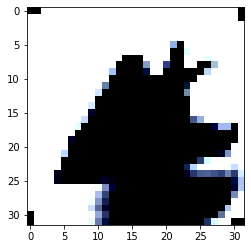

In [11]:
import matplotlib.pyplot as plt
for data in train:
    plt.imshow(data[0].permute(1,2,0))
    plt.show()
    break

# Making batches of 128 for train and 256 for test set

In [12]:
trainset = tc.utils.data.DataLoader(train, batch_size=200, shuffle=True)
testset = tc.utils.data.DataLoader(test, batch_size=200*2, shuffle=True)

In [13]:
trainset

In [14]:
for data in trainset:
    print(data)
    break

[tensor([[[[-2.4291e+00, -2.4291e+00, -2.4291e+00,  ...,  1.6224e+00,
            1.5836e+00, -2.4291e+00],
          [ 9.0514e-01,  1.1378e+00,  1.1184e+00,  ...,  2.2621e+00,
            2.2039e+00, -2.4291e+00],
          [ 1.2541e+00,  1.2928e+00,  1.2928e+00,  ...,  2.2621e+00,
            2.2427e+00, -2.4291e+00],
          ...,
          [-2.4291e+00,  1.2347e+00,  1.1571e+00,  ...,  1.6224e+00,
            1.3316e+00,  1.7193e+00],
          [-2.4291e+00,  1.2928e+00,  1.2735e+00,  ...,  1.6805e+00,
            1.3122e+00,  1.8162e+00],
          [-2.4291e+00,  6.3375e-01,  7.6945e-01,  ..., -2.4291e+00,
           -2.4291e+00, -2.4291e+00]],

         [[-2.4805e+00, -2.4805e+00, -2.4805e+00,  ...,  1.7962e+00,
            1.7356e+00, -2.4805e+00],
          [ 1.2515e+00,  1.4734e+00,  1.4532e+00,  ...,  2.4215e+00,
            2.3408e+00, -2.4805e+00],
          [ 1.5944e+00,  1.6348e+00,  1.6348e+00,  ...,  2.4013e+00,
            2.3610e+00, -2.4805e+00],
          ...,
    

In [15]:
# Output labels for a single batch
data[1]

tensor([1, 8, 9, 5, 9, 9, 6, 1, 8, 7, 1, 3, 8, 2, 7, 3, 1, 9, 8, 1, 3, 0, 0, 5,
        8, 9, 3, 7, 5, 6, 0, 7, 2, 0, 4, 4, 3, 6, 0, 6, 6, 0, 9, 3, 7, 8, 3, 6,
        9, 7, 8, 0, 2, 1, 1, 7, 8, 0, 7, 0, 1, 9, 6, 9, 3, 4, 3, 7, 8, 4, 9, 9,
        9, 0, 5, 2, 5, 2, 2, 4, 8, 3, 9, 8, 1, 6, 6, 2, 6, 8, 6, 3, 5, 3, 8, 5,
        8, 6, 2, 2, 6, 6, 9, 6, 2, 2, 1, 4, 8, 6, 2, 4, 5, 8, 7, 2, 9, 9, 6, 5,
        2, 6, 4, 0, 8, 0, 7, 0, 9, 3, 5, 2, 3, 4, 2, 6, 0, 0, 5, 2, 4, 6, 9, 6,
        9, 3, 7, 7, 8, 0, 2, 7, 2, 7, 6, 1, 6, 3, 2, 0, 2, 6, 1, 0, 0, 3, 7, 0,
        4, 6, 9, 9, 3, 6, 9, 3, 5, 6, 3, 4, 1, 2, 4, 7, 1, 4, 1, 5, 8, 3, 7, 9,
        1, 5, 6, 2, 7, 6, 8, 2])

# Making the Resnet9 architecture

In [16]:
import torch as tc
import torch.nn as nn
import torch.nn.functional as F

In [17]:
def conv_block(in_channels,out_channels,pool=False):
    layers = [nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1),nn.BatchNorm2d(out_channels),nn.ReLU(inplace=True)]
    if pool : layers.append(nn.MaxPool2d((2)))
    return nn.Sequential(*layers)

In [18]:
class Resnet9(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = conv_block(3,64)
        self.conv2 = conv_block(64,128,pool=True)
        self.res1 = nn.Sequential(conv_block(128,128),conv_block(128,128))
        self.conv3 = conv_block(128,256,pool=True)
        self.conv4 = conv_block(256,512,pool=True)
        self.res2 = nn.Sequential(conv_block(512,512),conv_block(512,512))  # current shape is 512 x 4 x 4 
        self.classifier = nn.Sequential(nn.MaxPool2d(4),                    # maxpool makes it shape to 512 x 1 x 1 
            nn.Flatten(),nn.Dropout(0.2),nn.Linear(512,10))

    # feed forward layer
    def forward(self,x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

net = Resnet9()
print(net)

Resnet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# Defining optimizer and loss function

In [19]:
import torch.optim as optim

Epochs = 8
max_lr = 0.01
grad_clip = 0.1
wt_decay = 1e-4
optimizer = optim.Adam(net.parameters(),lr=max_lr,weight_decay=wt_decay)
sched = tc.optim.lr_scheduler.OneCycleLR(optimizer,max_lr,epochs=Epochs,steps_per_epoch=len(trainset))

for epoch in range(Epochs):
    for data in trainset:
        x, y = data[0],data[1]

        # assigning weights to be zero
        net.zero_grad()
        outputs = net(x)
        loss = F.cross_entropy(outputs,y)
        loss.backward()
        optimizer.step()

        # Gradient clipping
        nn.utils.clip_grad_value_(net.parameters(),grad_clip)
        
        # Update learning rate
        sched.step()
    
    print(f'Epoch : {epoch}, Loss : {loss}')

Epoch : 0, Loss : 1.231236457824707
Epoch : 1, Loss : 0.8764959573745728
Epoch : 2, Loss : 0.884991466999054
Epoch : 3, Loss : 0.5757851600646973
Epoch : 4, Loss : 0.42878445982933044
Epoch : 5, Loss : 0.30203917622566223
Epoch : 6, Loss : 0.3248789310455322
Epoch : 7, Loss : 0.24234546720981598


# Testing the model

In [23]:
correct = 0
total = 0

with tc.no_grad():
    for data in testset:
        i = 0
        x, y = data[0],data[1]
        outputs = net(x)[i]
        if(tc.argmax(outputs) == y[i]):
            correct += 1
        i+=1
        total += 1

print('Validation accuracy is given as : ',(correct/total))

Validation accuracy is given as :  0.92


# Thus, the total accuracy came out to be 92%.